In [32]:
#Standards
# -*- coding: utf-8 -*-

import os  #to interact with the OS
import sys  #command line arguments
import re  #string patter matching
import glob  #file wildcards search
import math  
import pickle
import datetime
from time import time
from tqdm import tqdm, tnrange, tqdm_notebook  #progress bar for iteration
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')  #ignore warning msg

#Wrangling
import numpy as np 
import pandas as pd  
import sklearn
import scipy as sp

#Pandas Config.
#For the default setting: reset_option(param) 
pd.set_option("display.max_rows", 100)  #출력할 행의 수
pd.set_option('display.max_columns', None)  #출력할 열의 수; None for the entire columns
pd.set_option('display.max_colwidth', 1000)  #열의 너비; None for the entire columns
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Format scientific notation from Pandas
#pd.options.display.float_format = '{:.5f}'.format

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

%autosave 120

Autosaving every 120 seconds


In [47]:
#Visualization
import matplotlib
import matplotlib.pyplot as plt  #visualization
from matplotlib import font_manager, rc #Matplotlib Config.
import seaborn as sns 

#interactive viz
import ipywidgets as widgets
from IPython.display import display

rc('font', family='AppleGothic')
matplotlib.style.use('ggplot')  #fivethirtyeight, seaborn
plt.rcParams['figure.figsize'] = (8, 6)
# plt.rcParams['font.family'] = 'serif'  #serif
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['axes.unicode_minus'] = False  #마이너스 깨짐 현상
# import matplotlib as mpl
# mpl.rc("figure", figsize=(24,12))

%matplotlib inline

In [34]:
!pwd

/Users/yeongilkim/git/team_gigo


In [27]:
path = "./data/raw/"
restaurant = pd.read_csv(path+"restaurant.csv").iloc[:,1:]
traffic = pd.read_csv(path+"traffic_count.csv")
building = pd.read_csv(path+"building_240324_1212.csv")

In [29]:
building.columns

Index(['height', 'mpluto_bbl', 'cnstrct_yr', 'globalid', 'bin', 'office_area',
       'retail_area', 'residential_area', 'OBJECTID', 'street_width_min',
       'street_width_max', 'posted_speed', 'betweeness', 'GTFS Stop ID',
       'distance_from_station(ft)', 'idw_aadt_2019', 'idw_aadt_2020',
       'idw_aadt_2021', 'idw_atvc_2018', 'idw_atvc_2019', 'idw_atvc_2020'],
      dtype='object')

In [36]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21123 entries, 0 to 21122
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   height                     20995 non-null  float64
 1   mpluto_bbl                 21123 non-null  int64  
 2   cnstrct_yr                 20876 non-null  float64
 3   globalid                   21123 non-null  object 
 4   bin                        21123 non-null  int64  
 5   office_area                21123 non-null  int64  
 6   retail_area                21123 non-null  int64  
 7   residential_area           21123 non-null  int64  
 8   OBJECTID                   21123 non-null  int64  
 9   street_width_min           18957 non-null  float64
 10  street_width_max           18904 non-null  float64
 11  posted_speed               21123 non-null  object 
 12  betweeness                 21123 non-null  float64
 13  GTFS Stop ID               21123 non-null  obj

In [35]:
# restaurant
building.head()

,height,mpluto_bbl,cnstrct_yr,globalid,bin,office_area,retail_area,residential_area,OBJECTID,street_width_min,street_width_max,posted_speed,betweeness,GTFS Stop ID,distance_from_station(ft),idw_aadt_2019,idw_aadt_2020,idw_aadt_2021,idw_atvc_2018,idw_atvc_2019,idw_atvc_2020
0,59.723,1021210037,1910.000,{A0E56BCC-A86B-4CEF-9A42-9B4ECD61743F},1062896,0,2250,10344,100007,60.000,60.000,25,0.012,A10,705.429,13651.723,15362.930,17083.134,110.061,140.829,332.411
1,155.490,1008870001,1935.000,{0B06F7A8-1F83-44F3-97DD-AC524A6374CA},1018457,50018,4000,0,101045,32.000,32.000,25,0.028,632,302.555,10065.446,10282.944,11495.144,129.011,178.320,272.447
2,167.214,1013490035,1931.000,{A091951D-C73E-4B77-9A61-716C666C5446},1039988,2890,0,70110,99804,60.000,60.000,25,0.012,F11,1378.470,14437.630,14445.844,16299.638,151.953,174.349,240.654
3,28.570,1010610006,1910.000,{2BE9F674-67E7-4A49-8535-F636A16D8DA5},1026714,0,0,0,103068,32.000,32.000,25,0.023,A25,1620.005,10455.418,10087.378,11238.596,163.403,182.998,237.267
4,73.130,1003060013,1900.000,{2403088E-77A6-4071-8B5E-D54AFBC720D9},1003956,0,3800,0,92425,34.000,45.000,25,0.034,D22,292.273,7632.300,7433.878,8351.143,105.344,137.101,350.242


In [81]:
# df = building.copy()
df = building[['cnstrct_yr',
               'height', 
                # 'mpluto_bbl', 
                # 'globalid', 
                'office_area',
                'retail_area', 
                'residential_area', 
                # 'OBJECTID', 
                'street_width_min',
                'street_width_max', 
                'posted_speed', 
                'betweeness', 
                # 'GTFS Stop ID',
                'distance_from_station(ft)', 
                'idw_aadt_2019', 
                'idw_aadt_2020',
                # 'idw_aadt_2021', 
                # 'idw_atvc_2018', 
                'idw_atvc_2019', 
                'idw_atvc_2020'
               ]].copy()

In [82]:
df

,cnstrct_yr,height,office_area,retail_area,residential_area,street_width_min,street_width_max,posted_speed,betweeness,distance_from_station(ft),idw_aadt_2019,idw_aadt_2020,idw_atvc_2019,idw_atvc_2020
0,1910.000,59.723,0,2250,10344,60.000,60.000,25,0.012,705.429,13651.723,15362.930,140.829,332.411
1,1935.000,155.490,50018,4000,0,32.000,32.000,25,0.028,302.555,10065.446,10282.944,178.320,272.447
2,1931.000,167.214,2890,0,70110,60.000,60.000,25,0.012,1378.470,14437.630,14445.844,174.349,240.654
3,1910.000,28.570,0,0,0,32.000,32.000,25,0.023,1620.005,10455.418,10087.378,182.998,237.267
4,1900.000,73.130,0,3800,0,34.000,45.000,25,0.034,292.273,7632.300,7433.878,137.101,350.242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21118,1890.000,45.000,0,9411,32984,22.000,24.000,,0.002,1055.892,11320.921,11559.127,184.511,254.638
21119,2012.000,26.006,5000,5000,0,40.000,40.000,25,0.020,385.957,7757.683,7938.152,135.711,350.298
21120,2023.000,338.000,0,0,0,20.000,22.000,25,0.011,311.235,6615.447,6014.822,146.683,371.640
21121,1925.000,84.720,23039,2000,0,22.000,24.000,25,0.006,330.922,8786.004,7764.175,147.024,372.501


# EDA

## null values

In [117]:
df.isnull().sum()

cnstrct_yr                    247
height                        128
office_area                     0
retail_area                     0
residential_area                0
street_width_min             2166
street_width_max             2219
posted_speed                    0
betweeness                      0
distance_from_station(ft)       0
idw_aadt_2019                   0
idw_aadt_2020                   0
idw_atvc_2019                   0
idw_atvc_2020                   0
area_type                       0
dtype: int64

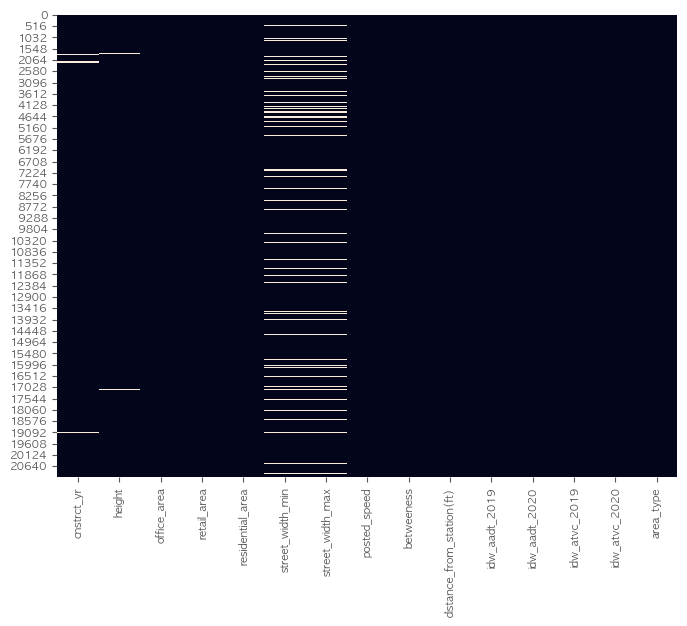

In [118]:
sns.heatmap(df.isnull(), cbar=False);

In [129]:
df.dropna(inplace=True)

In [130]:
df.isnull().sum()

cnstrct_yr                   0
height                       0
office_area                  0
retail_area                  0
residential_area             0
street_width_min             0
street_width_max             0
posted_speed                 0
betweeness                   0
distance_from_station(ft)    0
idw_aadt_2019                0
idw_aadt_2020                0
idw_atvc_2019                0
idw_atvc_2020                0
area_type                    0
dtype: int64

## contruction year

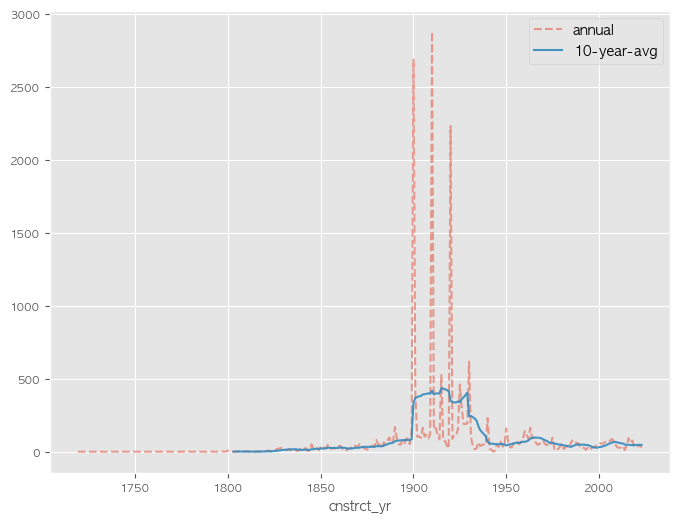

In [60]:
df.groupby("cnstrct_yr").size().plot(alpha=.5, linestyle="--", label="annual")
df.groupby("cnstrct_yr").size().rolling(10).mean().plot(alpha=.9, label="10-year-avg")
# df.groupby("cnstrct_yr").size().rolling(30).mean().plot(alpha=.9)

plt.legend()

## height
- probably in ft unit
- mean=88, but max=1550, suggesting there would be long-tailed distribution(right-skewed)

In [61]:
df["height"].describe()

count   20995.000
mean       88.129
std        89.621
min         0.000
25%        46.710
50%        60.240
75%        86.195
max      1550.000
Name: height, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x12849d050>,
 'caps': [<matplotlib.lines.Line2D at 0x12849e4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12849c4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12849f990>],
 'fliers': [<matplotlib.lines.Line2D at 0x1284b8450>],
 'means': []}

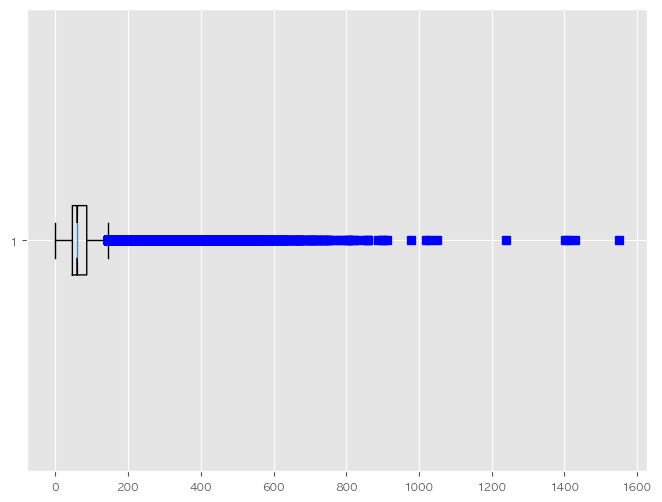

In [78]:
plt.boxplot(df[df["height"].lt(1600)]['height'],
            notch=1, # if 'True' then notched box plot
            sym='bs', # symbol: red square
            vert=0 # vertical : if 'False' then horizontal box plot
           )

# plt.ylim([0, 1600])

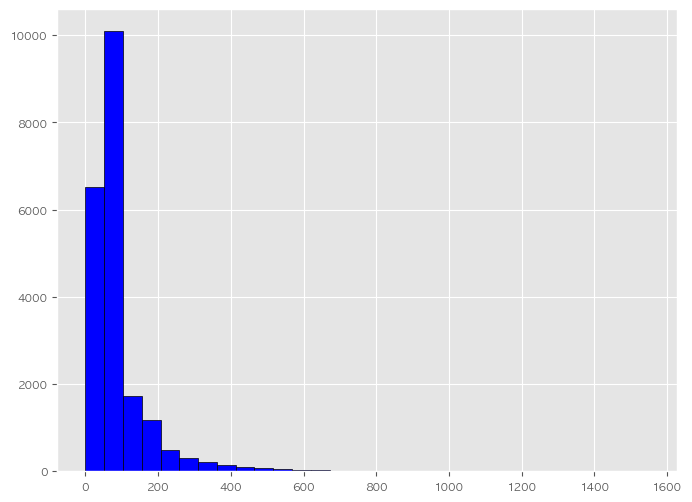

In [80]:
plt.hist(df['height'], 
         color = 'blue', 
         edgecolor = 'black', 
         bins=30);

## area
- office/retail/residential
- it could be transformed into one column containing all three columns?
- theoretically, possible options: OF, RT, RS, and, OFRT, OFRS, RTRS, ALL, NA
- in this case, it may lose info about the ratio of occupied area by the respective type
- it might be better to simply use it as is, or implement PCA 

In [102]:
df["area_type"] = np.where((df["office_area"].ne(0)) & (df["retail_area"].ne(0)) & (df["residential_area"].ne(0)), "ALL", 
                            np.where((df["office_area"].ne(0)) & (df["retail_area"].ne(0)), "OFRT", 
                            np.where((df["office_area"].ne(0)) & (df["residential_area"].ne(0)), "OFRS",
                            np.where((df["retail_area"].ne(0)) & (df["residential_area"].ne(0)), "RTRS",
                                np.where(df["office_area"].ne(0), "OF",
                                np.where(df["retail_area"].ne(0), "RT",
                                np.where(df["residential_area"].ne(0), "RS", "NA")
                                        )
                                        )
                                    )
                                    )
                                    )
                          )

<Axes: xlabel='area_type'>

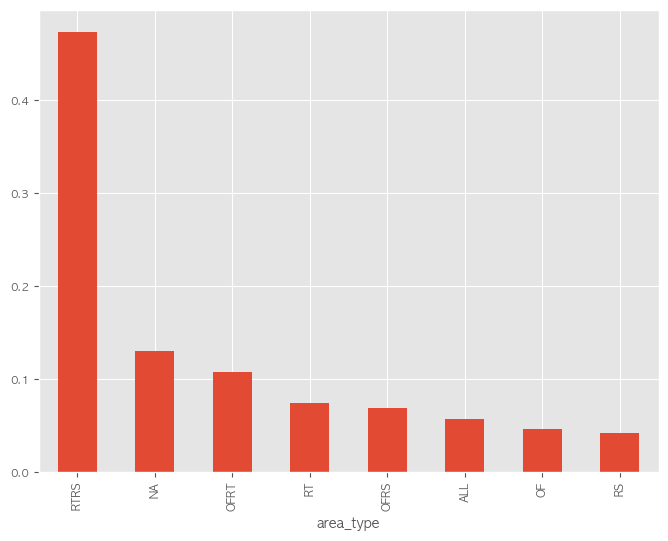

In [108]:
# df.head(30)
df["area_type"].value_counts(normalize=True).plot(kind="bar")

## posted speed
- there are many emptry-spaced records => replace it with NOLIMIT / NO INFO?
- NO INFO: more likely, because the majority of records have less or equal to 25
- Does this useful variable? prob not -- eg. diff of 5 means something?

In [42]:
df["posted_speed"].unique()

array(['25', '  ', '20', '40', '30', '50', '35', '45'], dtype=object)

In [43]:
df.groupby("posted_speed").size()

posted_speed
       2508
20      964
25    17601
30       10
35        5
40       29
45        1
50        5
dtype: int64

In [ ]:
df.drop("posted_speed", axis=1, inplace=True)

## betweenness
- 

In [110]:
df.head()

,cnstrct_yr,height,office_area,retail_area,residential_area,street_width_min,street_width_max,posted_speed,betweeness,distance_from_station(ft),idw_aadt_2019,idw_aadt_2020,idw_atvc_2019,idw_atvc_2020,area_type
0,1910.000,59.723,0,2250,10344,60.000,60.000,25,0.012,705.429,13651.723,15362.930,140.829,332.411,RTRS
1,1935.000,155.490,50018,4000,0,32.000,32.000,25,0.028,302.555,10065.446,10282.944,178.320,272.447,OFRT
2,1931.000,167.214,2890,0,70110,60.000,60.000,25,0.012,1378.470,14437.630,14445.844,174.349,240.654,OFRS
3,1910.000,28.570,0,0,0,32.000,32.000,25,0.023,1620.005,10455.418,10087.378,182.998,237.267,NA
4,1900.000,73.130,0,3800,0,34.000,45.000,25,0.034,292.273,7632.300,7433.878,137.101,350.242,RT


In [112]:
df["betweeness"].describe()

count   21123.000
mean        0.019
std         0.026
min         0.000
25%         0.004
50%         0.009
75%         0.024
max         0.327
Name: betweeness, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x12c2a08d0>,
 'caps': [<matplotlib.lines.Line2D at 0x12c2a1890>,
 'boxes': [<matplotlib.lines.Line2D at 0x128fd3dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x12c2a2a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c2a3550>],
 'means': []}

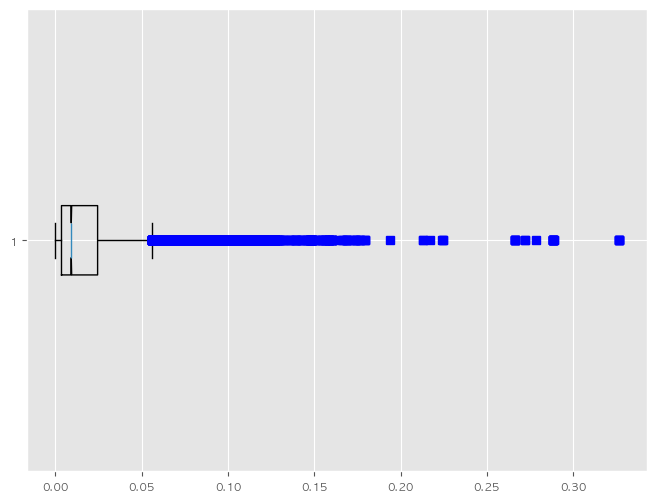

In [113]:
plt.boxplot(df['betweeness'],
            notch=1, # if 'True' then notched box plot
            sym='bs', # symbol: red square
            vert=0 # vertical : if 'False' then horizontal box plot
           )

# plt.ylim([0, 1600])

## distance from station

In [115]:
df["distance_from_station(ft)"].describe()

count   21123.000
mean      927.872
std       716.260
min         0.000
25%       492.714
50%       793.200
75%      1174.057
max     10202.279
Name: distance_from_station(ft), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x12b51d350>,
 'caps': [<matplotlib.lines.Line2D at 0x12c20d910>,
 'boxes': [<matplotlib.lines.Line2D at 0x12c1ee710>],
 'medians': [<matplotlib.lines.Line2D at 0x12c20cd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c20d9d0>],
 'means': []}

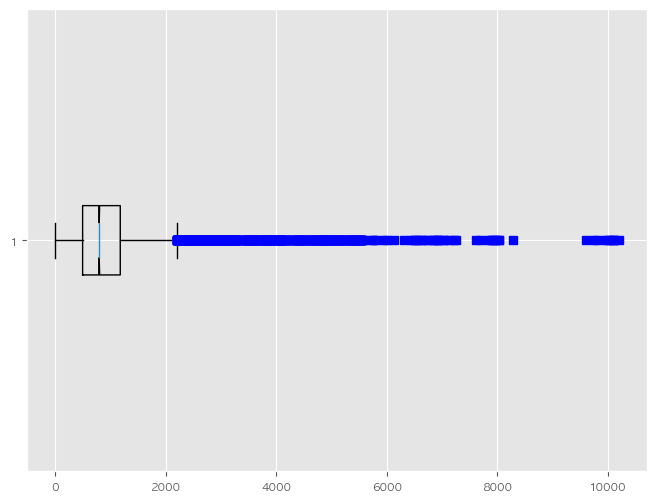

In [116]:
plt.boxplot(df["distance_from_station(ft)"],
            notch=1, # if 'True' then notched box plot
            sym='bs', # symbol: red square
            vert=0 # vertical : if 'False' then horizontal box plot
           )

# plt.ylim([0, 1600])

## annual average daily traffic

In [119]:
df["idw_aadt_2019"].describe()

count   21123.000
mean    11197.792
std      4126.234
min      3130.869
25%      8614.010
50%     10885.009
75%     12902.035
max     98256.184
Name: idw_aadt_2019, dtype: float64

## annual average daily traffic count

In [120]:
df["idw_atvc_2019"].describe()

count   21123.000
mean      158.106
std        21.808
min        55.514
25%       143.297
50%       155.505
75%       172.357
max       604.226
Name: idw_atvc_2019, dtype: float64

## correlations

In [122]:
df.columns

Index(['cnstrct_yr', 'height', 'office_area', 'retail_area',
       'residential_area', 'street_width_min', 'street_width_max',
       'posted_speed', 'betweeness', 'distance_from_station(ft)',
       'idw_aadt_2019', 'idw_aadt_2020', 'idw_atvc_2019', 'idw_atvc_2020',
       'area_type'],
      dtype='object')

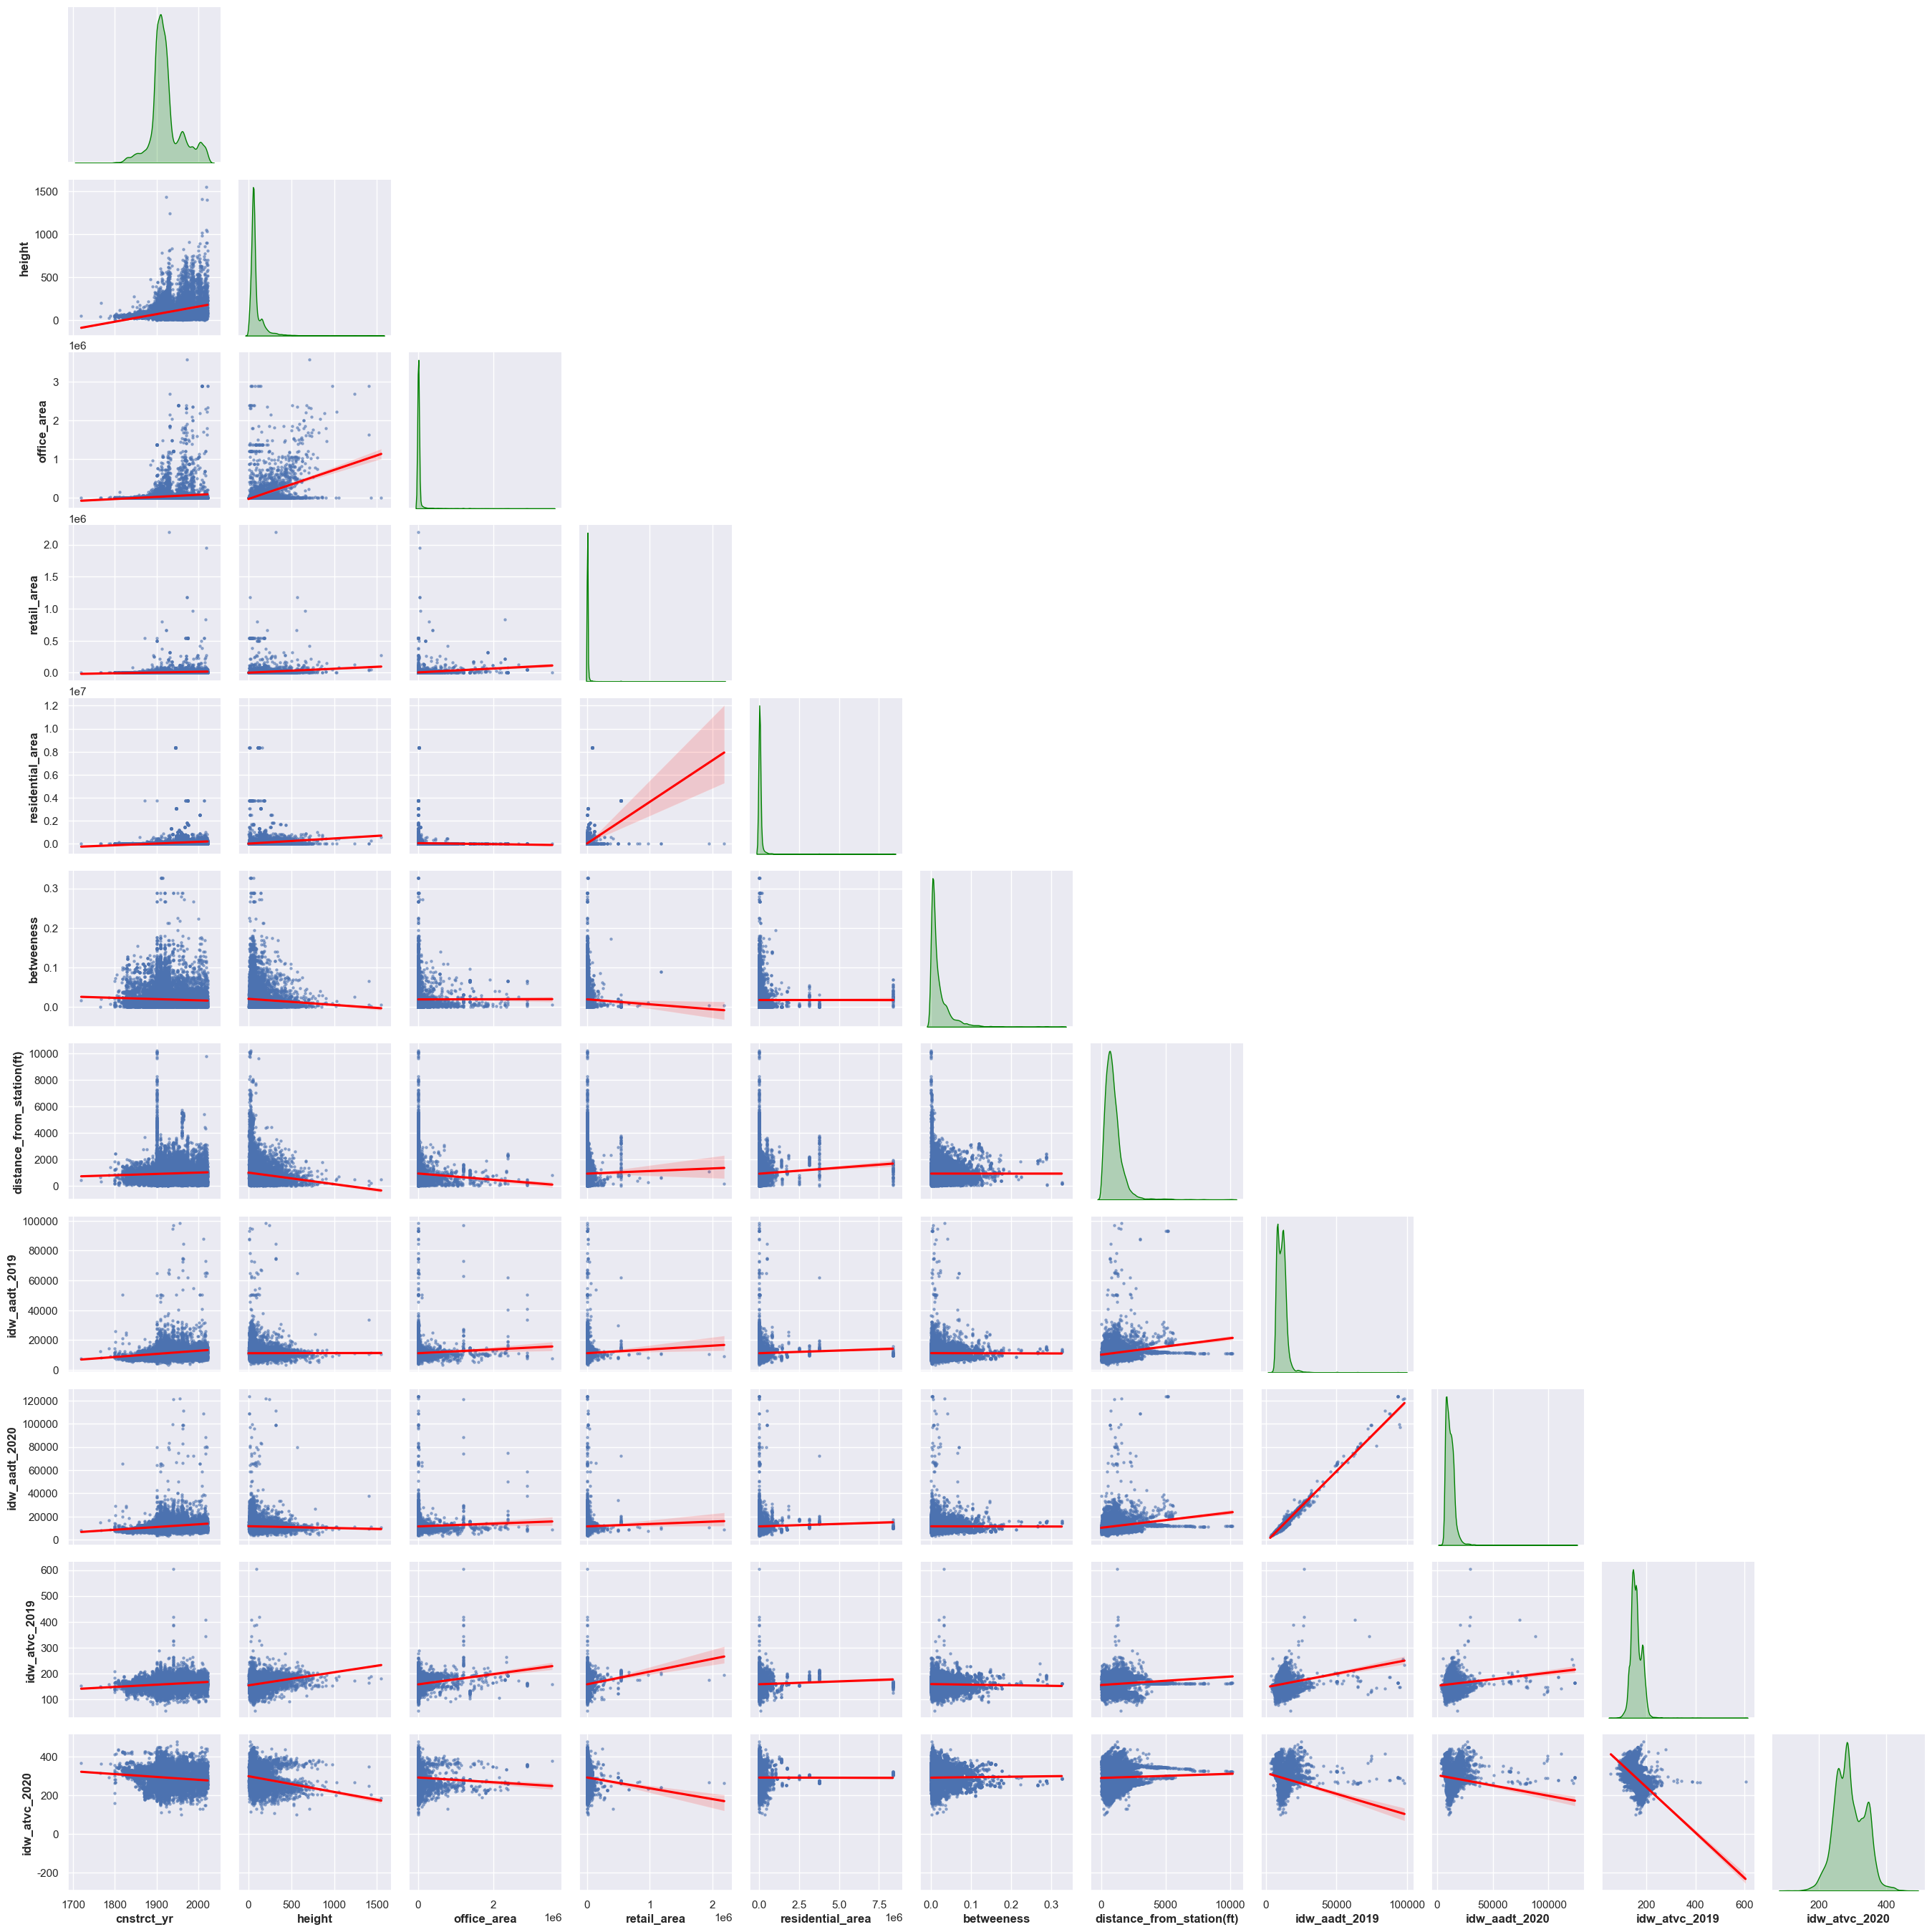

In [123]:
#pairplot for pairwise relationships between variables 
sns.set()
cols = ['cnstrct_yr', 'height', 'office_area', 'retail_area',
       'residential_area','betweeness', 'distance_from_station(ft)',
       'idw_aadt_2019', 'idw_aadt_2020', 'idw_atvc_2019', 'idw_atvc_2020']
sns.pairplot(df[cols], corner=True, kind='reg', diag_kind='kde', #diag_kind='hist'
            #  hue='BldgType',
             diag_kws={'color':'green'},
             plot_kws={'scatter_kws': {'s':5, 'alpha': 0.5}, 'line_kws':{'color':'red'}})
# plt.legend()
plt.show();

# Modeling
- handling mixed-typed data can be challenging
- try to utilize algorithms like K-Prototypes 

In [125]:
df.columns

Index(['cnstrct_yr', 'height', 'office_area', 'retail_area',
       'residential_area', 'street_width_min', 'street_width_max',
       'posted_speed', 'betweeness', 'distance_from_station(ft)',
       'idw_aadt_2019', 'idw_aadt_2020', 'idw_atvc_2019', 'idw_atvc_2020',
       'area_type'],
      dtype='object')

In [124]:
df.head()

,cnstrct_yr,height,office_area,retail_area,residential_area,street_width_min,street_width_max,posted_speed,betweeness,distance_from_station(ft),idw_aadt_2019,idw_aadt_2020,idw_atvc_2019,idw_atvc_2020,area_type
0,1910.000,59.723,0,2250,10344,60.000,60.000,25,0.012,705.429,13651.723,15362.930,140.829,332.411,RTRS
1,1935.000,155.490,50018,4000,0,32.000,32.000,25,0.028,302.555,10065.446,10282.944,178.320,272.447,OFRT
2,1931.000,167.214,2890,0,70110,60.000,60.000,25,0.012,1378.470,14437.630,14445.844,174.349,240.654,OFRS
3,1910.000,28.570,0,0,0,32.000,32.000,25,0.023,1620.005,10455.418,10087.378,182.998,237.267,NA
4,1900.000,73.130,0,3800,0,34.000,45.000,25,0.034,292.273,7632.300,7433.878,137.101,350.242,RT


In [131]:
X = df[['cnstrct_yr', 'height', 'office_area', 'retail_area',
       'residential_area']]
    # 'betweeness', 'distance_from_station(ft)',
    #    'idw_aadt_2019', 'idw_aadt_2020', 'idw_atvc_2019', 'idw_atvc_2020',
    #    'area_type']]

In [148]:
from sklearn.preprocessing import StandardScaler

# Standardize the combined dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [166]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA()  #n_components=6
X_pca = pca.fit_transform(X_scaled)

In [167]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Cumulative explained variance ratio
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()
print("Cumulative explained variance ratio:", cumulative_explained_variance_ratio)

Explained variance ratio: [0.29345181 0.19082997 0.17174089 0.14527365 0.11600557 0.08269811]
Cumulative explained variance ratio: [0.29345181 0.48428178 0.65602267 0.80129632 0.91730189 1.        ]


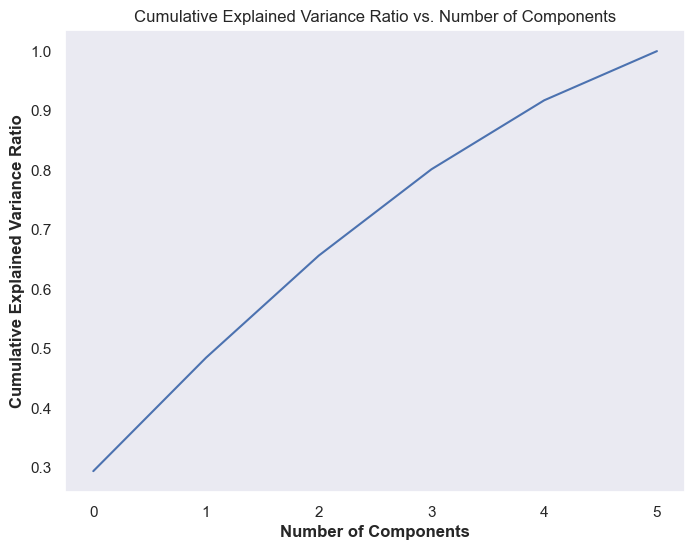

In [170]:
# Elbow method to determine the optimal number of components
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid()
plt.show()

## DBSCAN

In [140]:
from sklearn.cluster import DBSCAN
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# Instantiate and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_pca)

DBSCAN()

In [143]:
# Assign cluster labels to data records
X['cluster'] = dbscan.labels_

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [146]:
X['cluster'].value_counts()

cluster
-1     16513
 0      1844
 5        41
 9        35
 8        28
 4        23
 7        20
 3        18
 20       11
 10        9
 14        9
 12        8
 6         8
 11        7
 22        7
 24        6
 18        6
 16        5
 23        5
 21        5
 17        5
 15        5
 25        5
 13        5
 1         5
 2         5
 19        5
Name: count, dtype: int64

In [145]:
dbscan.labels_

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

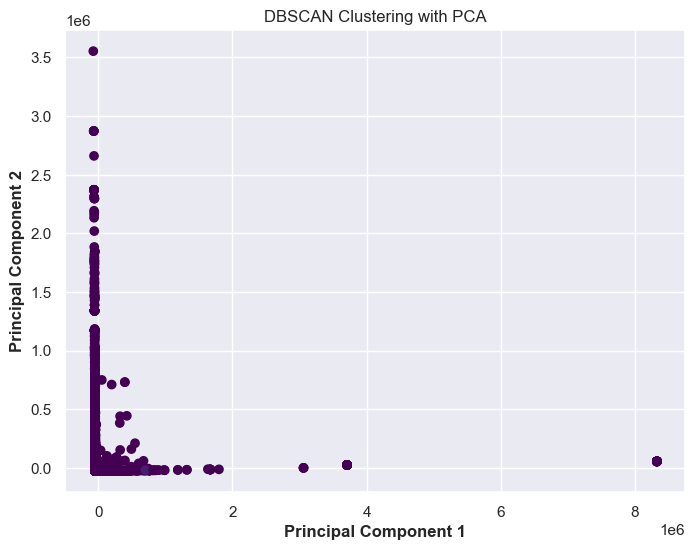

In [142]:

# Visualize clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
